<a href="https://colab.research.google.com/github/shajohn4/Portfolio/blob/main/Reference_Notebook_Milestone_1_Deep_Learning_Final_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b>Milestone 1

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

###<b> Mounting the Drive

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <b>Loading libraries</b>

In [3]:
#Importing libraries required to load the data

import zipfile
import os
from PIL import Image
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, LeakyReLU, GlobalAvgPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers, backend
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
backend.clear_session()

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [4]:
#Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/CNN Project Malaria Detection/cell_images.zip'

#The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

The files have been extracted to the local session of Google Colab. The extracted folder would have the following structure:

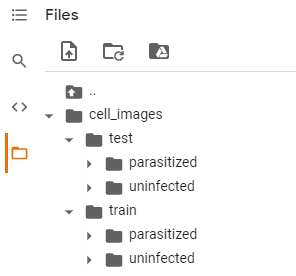

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [5]:
#Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

#Size of image so that each image has the same size
SIZE = 64

#Empty list to store the training images after they are converted to NumPy arrays
train_images = []

#Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [6]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            #Resizing each image to (224,224)
            image = image.resize((SIZE, SIZE))

            #Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                train_labels.append(1)
            else:
                train_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [7]:
#Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

#Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

#Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

#Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [8]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            #Resizing each image to (128,128)
            image = image.resize((SIZE, SIZE))
            
            #Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                test_labels.append(1)
            else:
                test_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [9]:
# shape of images
print(f'Dimension of Train Image is {train_images.ndim}')
print(f'Dimension of Test Image is {test_images.ndim}')


print(f'Shape of Train Image is {train_images.shape}')
print(f'Shape of Test Image is {test_images.shape}')


print(f'Length of Train Image is {len(train_images)}')
print('Length of Test Image is {len(test_images)} ')

print(f'Size of Train Image is {train_images.size}')
print(f'Size of Test Image is {test_images.size}')

print(f'Type of Train Image is {train_images.dtype}')
print(f'Type of Test Image is {test_images.dtype}')


Dimension of Train Image is 4
Dimension of Test Image is 4
Shape of Train Image is (24958, 64, 64, 3)
Shape of Test Image is (2600, 64, 64, 3)
Length of Train Image is 24958
Length of Test Image is {len(test_images)} 
Size of Train Image is 306683904
Size of Test Image is 31948800
Type of Train Image is uint8
Type of Test Image is uint8


###<b> Checking the shape of train and test labels

In [10]:
# shape of labels 
print(f'Shape of Train Labels is {train_labels.shape}')
print(f'Shape of Train Labels is {test_labels.shape}')

Shape of Train Labels is (24958,)
Shape of Train Labels is (2600,)


#####<b> Observations and insights: _____
We have 24958 elements in training dataset. These images are of size 64 and they are represented as a matrix of 3.

We have 2600 elements in testing dataset. These images are of size 64 and they are represented as a matrix of 3.

The training and Testing Labels are defined as 1 for Parasetized Image and zero for uninfected images

### <b>Check the minimum and maximum range of pixel values for train and test images

In [11]:
# try to use min and max function from numpyprint(train_images.min())
print(f'Trai Images Min is {train_images.min()}')
print(f'Test Images Min is {test_images.min()}')
print(f'Train Labels Min is {train_labels.min()}')
print(f'Test Labels Min is {test_labels.min()}')
print(f'Train Images Max is {train_images.max()}')
print(f'Test Images Max is {test_images.max()}')
print(f'Train Labels Max is {train_labels.max()}')
print(f'Test Labels Max is {test_labels.max()}')

Trai Images Min is 0
Test Images Min is 0
Train Labels Min is 0
Test Labels Min is 0
Train Images Max is 255
Test Images Max is 255
Train Labels Max is 1
Test Labels Max is 1


#####<b> Observations and insights: _____

All the labels are of same size. This is needed for us to have our model evaluate the images appropriately 

In [12]:
# visualizing the first 10 images in the training dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i], cmap="gray")
    plt.axis('off')

plt.show()
print(f'Label for each of the above image: {(train_labels[0:10])}' )

Label for each of the above image: [1 1 1 1 1 1 1 1 1 1]


In [13]:
# visualizing the first 10 images in the testing dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(test_images[i], cmap="gray")
    plt.axis('off')

plt.show()
print(f'Label for each of the above Test image: {(test_labels[0:10])}')

Label for each of the above Test image: [1 1 1 1 1 1 1 1 1 1]


###<b> Count the number of values in both uninfected and parasitized 

In [14]:
# try to use value_counts to count the values
from collections import Counter

print(f'Train Labels are : {Counter(train_labels)}'  )
print(f'Test Labels are : {Counter(test_labels)}'  )

train_data_series = pd.Series(train_labels) 
train_data_series.value_counts()


test_data_series = pd.Series(test_labels) 
test_data_series.value_counts()


Train Labels are : Counter({1: 12479, 0: 12479})
Test Labels are : Counter({1: 1300, 0: 1300})


1    12479
0    12479
dtype: int64

###<b>Normalize the images

In [15]:
# try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images).astype('float32')/255
test_images = (test_images).astype('float32')/255

In [16]:
print('Training set:', train_images.shape)
print('Test set:', test_images.shape)

Training set: (24958, 64, 64, 3)
Test set: (2600, 64, 64, 3)


#####<b> Observations and insights: _____

All Images are of same shape and are of 64 X 64 Pixel

###<b> Plot to check if the data is balanced

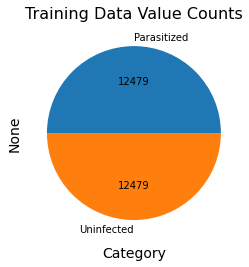

In [17]:
# you are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced
%matplotlib inline
fig, ax = plt.subplots()

new_train_series = train_data_series.value_counts()
new_train_series=new_train_series.rename(index={1:'Parasitized', 0:'Uninfected'})

new_test_series = test_data_series.value_counts()
new_test_series=new_test_series.rename(index={1:'Parasitized', 0:'Uninfected'})

ax.set_xlabel('Category', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Training Data Value Counts', fontsize=16)
new_train_series.plot.pie(autopct=lambda p: new_train_series.loc['Parasitized'])
plt.show()

#####<b> Observations and insights: _____
Chart depicts we have equal distribution of images as Infected and Unifected

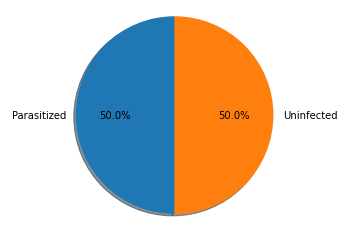

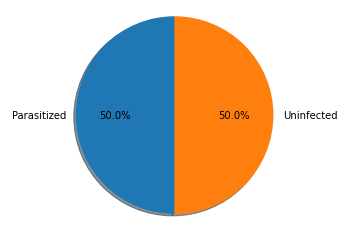

In [18]:
# you are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced
# plt.style.use('_mpl-gallery-nogrid')

%matplotlib inline

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
Title = "Label Category"
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.pie(new_train_series.iloc[:], labels=new_train_series.index
        ,  autopct='%1.1f%%' , shadow=True, startangle=90)     
ax2.pie(new_test_series.iloc[:], labels=new_test_series.index, autopct='%1.1f%%',
        shadow=True, startangle=90)   


ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### <b>Data Exploration</b>
Let's visualize the images from the train data

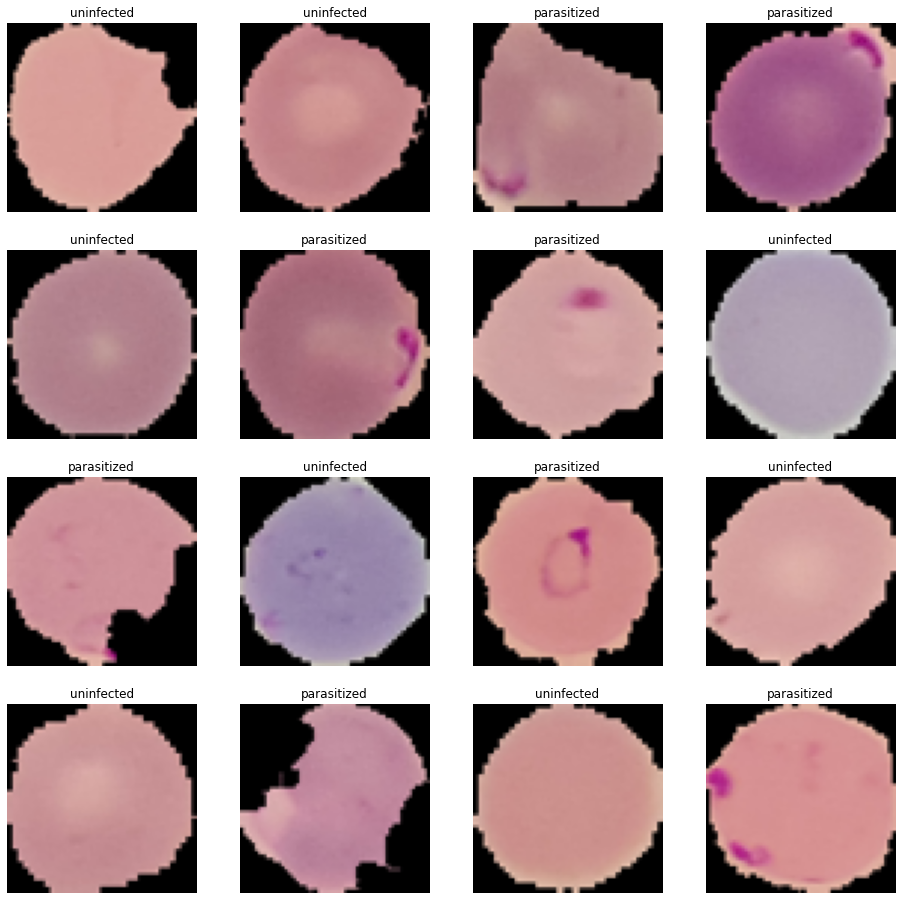

In [19]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)
plt.figure(1 , figsize = (16 , 16))

for n in range(1, 17):
    plt.subplot(4, 4, n)
    index = int(np.random.randint(0, train_images.shape[0], 1))
    if train_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(train_images[index])
    plt.axis('off')

#####<b> Observations and insights: _____

###<b> Similarly visualize the images with subplot(6,6) and figsize=(12,12)

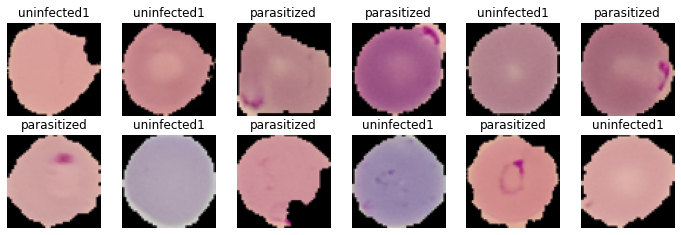

In [20]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate

np.random.seed(42)
plt.figure(1 , figsize = (12 , 12))

for n in range(1, 13):
    plt.subplot(6, 6, n)
    index = int(np.random.randint(0, train_images.shape[0], 1))
    if train_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected1')
    plt.imshow(train_images[index])
    plt.axis('off')

#####<b>Observations and insights:

As we had noticed in the Training Images, the Testing images also have similar findings. Infected cell images have a patch in them, while unifected don't.

###<b> Plotting the mean images for parasitized and uninfected

In [21]:
# function to find the mean
def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]
    # reshape it back to a matrix
    plt.imshow(mean_img)
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

<b> Mean image for parasitized

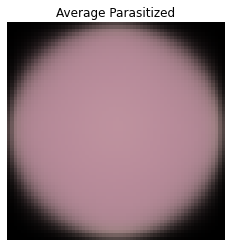

In [22]:
# If the label=1 then the image is parasitised and if the label=0 then the image is uninfected
parasitized_data=[]                                # Create a list to store the parasitized data
for img, label in zip(train_images, train_labels):
        if label==1:
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean


<b> Mean image for uninfected

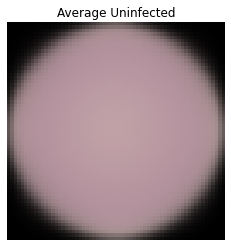

In [23]:
# Similarly write the code to find the mean image of uninfected

uninfected_data=[]                                # Create a list to store the uninfected data
for img, label in zip(train_images, train_labels):
        if label==0:
              uninfected_data.append([img])          

uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')   # find the mean


#####<b> Observations and insights: _____

We are not able to get any major insight from the average images. We need to look at other aspects

### <b>Converting RGB to HSV of Images using OpenCV

####<b> Converting the train data

In [24]:
import cv2
gfx=[]   # to hold the HSV image array
for i in np.arange(0,100,1):
  a=cv2.cvtColor(train_images[i],cv2.COLOR_BGR2HSV)
  gfx.append(a)
gfx=np.array(gfx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


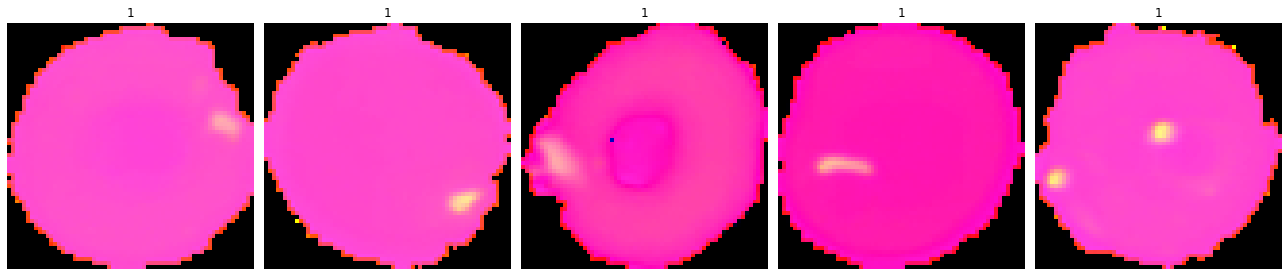

In [25]:
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=train_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gfx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

####<b> Converting the test data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


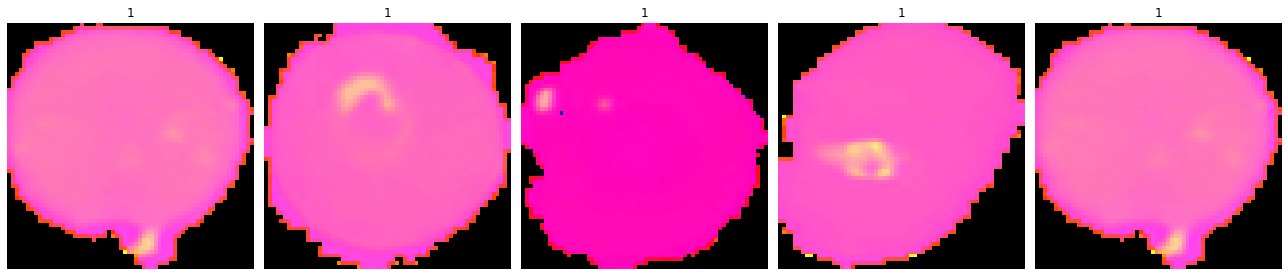

In [26]:
# Similarly you can visualize for the images in the test data
gfx=[]   # to hold the HSV image array
for i in np.arange(0,100,1):
  a=cv2.cvtColor(test_images[i],cv2.COLOR_BGR2HSV)
  gfx.append(a)
gfx=np.array(gfx)

viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=test_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gfx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

#####<b>Observations and insights: _____

Looking at the color images of training and test, we are not able to differentiate very clearly between Infected and UnInfected. Certain images are showing yellow patches which we need to affirm if they are infected.

###<b> Processing Images using Gaussian Blurring

####<b> Gaussian Blurring on train data

In [27]:
gbx=[]  ## to hold the blurred images
for i in np.arange(0,100,1):
  b= cv2.GaussianBlur(train_images[i], (5, 5), 0)
  gbx.append(b)
gbx=np.array(gbx)

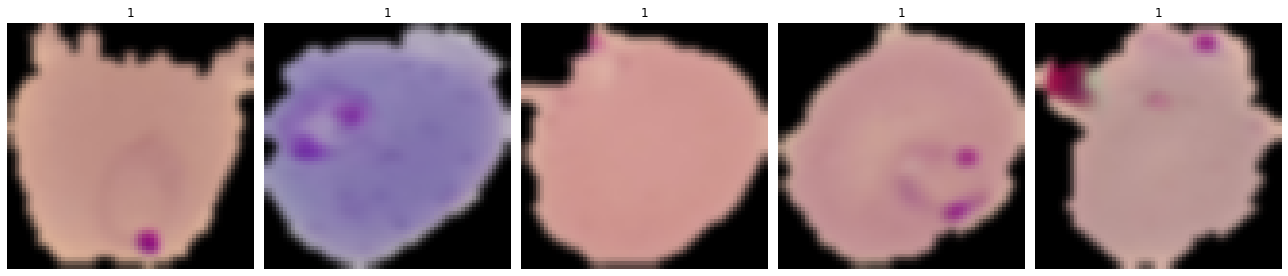

In [28]:
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=train_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gbx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

####<b> Gaussian Blurring on test data

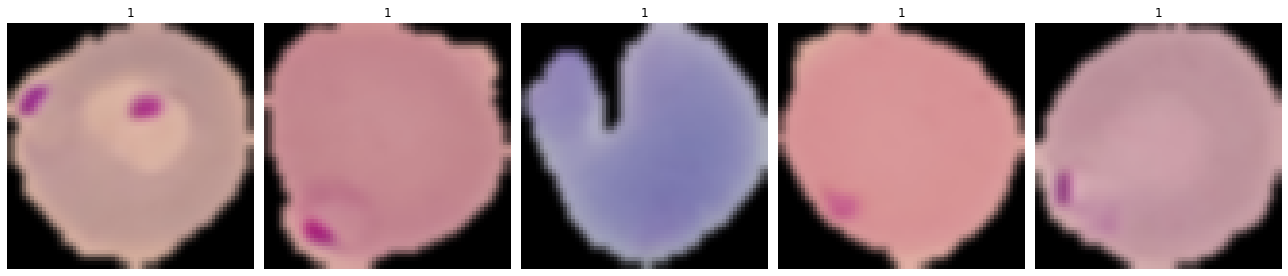

In [29]:
# Similarly you can apply Gaussian blurring for the images in the test data

gbx=[]  ## to hold the blurred images
for i in np.arange(0,100,1):
  b= cv2.GaussianBlur(test_images[i], (5, 5), 0)
  gbx.append(b)
gbx=np.array(gbx)

viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=test_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gbx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

#####**Observations and insights: _____**

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

The blurred images are giving better picture vs the colored images. The blurred images clearly depicts that the infected cells have patches while uninfected not.

We can try to see if we can convert the colored picture into grey scale too and see if that is giving any indications.

## **Proposed approach**

**Potential techniques:** What different techniques should be explored?<br>
**Overall solution design:** What is the potential solution design?<br>
**Measures of success:** What are the key measures of success to compare different techniques?<br>

This scenario falls in the category of Binary Classification and since the infections are spread across various areas of the images, using a CNN model would be of benefit.
We would try to use convolutional neural network with different combinatios and validate how much efficiency we are getting.
We can try different methods in CNN (e.g. data augmentation, max pooling) and see which one would give best results.

Tried to convert images to GrayScale to see if we can get any better picture.

In [30]:
grfx=[]   # to hold the grey scale image array
for i in np.arange(0,100,1):
  a=cv2.cvtColor(train_images[i], cv2.COLOR_BGR2GRAY)
  grfx.append(a)
grfx=np.array(grfx)

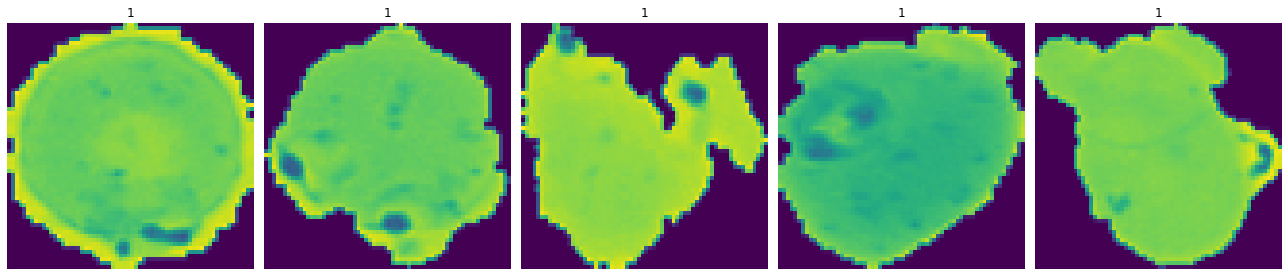

In [31]:
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=train_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(grfx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

Same finding as earlier the infected images have patches.

MileStone 2 Code Starts from here

###<B>One Hot Encoding on the train and test labels

In [32]:
# Encoding Train Labels
train_labels=to_categorical(train_labels,2)
# Similarly let us try to encode test labels
test_labels=to_categorical(test_labels,2)

In [33]:
#Clearing backend
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Building the model

In [34]:

#creating sequential model
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

####<b> Compiling the model

In [35]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

<b> Using Callbacks 

In [36]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b> Fit and train our Model

In [37]:
#Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history=model.fit(train_images,train_labels,batch_size=32,callbacks=callbacks,validation_split=0.2,epochs=20,verbose=1)

Epoch 1/20
624/624 [==============================] - 93s 148ms/step - loss: 0.4399 - accuracy: 0.7845 - val_loss: 0.2175 - val_accuracy: 0.9265
Epoch 2/20
624/624 [==============================] - 91s 146ms/step - loss: 0.1757 - accuracy: 0.9400 - val_loss: 0.2005 - val_accuracy: 0.9347
Epoch 3/20
624/624 [==============================] - 91s 146ms/step - loss: 0.1617 - accuracy: 0.9452 - val_loss: 0.1774 - val_accuracy: 0.9623
Epoch 4/20
624/624 [==============================] - 91s 146ms/step - loss: 0.1502 - accuracy: 0.9492 - val_loss: 0.1305 - val_accuracy: 0.9770
Epoch 5/20
624/624 [==============================] - 91s 146ms/step - loss: 0.1447 - accuracy: 0.9514 - val_loss: 0.1378 - val_accuracy: 0.9756
Epoch 6/20
624/624 [==============================] - 91s 145ms/step - loss: 0.1395 - accuracy: 0.9538 - val_loss: 0.1352 - val_accuracy: 0.9692


####<b> Evaluating the model on test data

In [38]:
accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 3s 37ms/step - loss: 0.1525 - accuracy: 0.9492

 Test_Accuracy:- 0.9492307901382446


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1300
           1       0.96      0.94      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



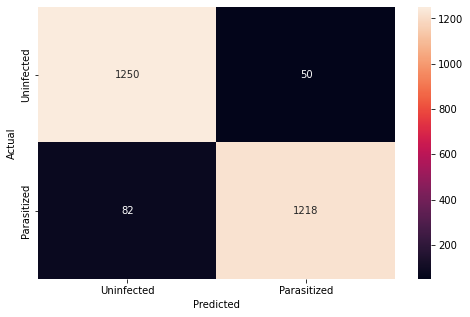

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)

#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b>Plotting the train and validation curves

In [40]:
# function to plot train and validation accuracy 
def plot_accuracy(history):
    N = len(history.history["accuracy"])
    plt.figure(figsize=(7,7))
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy", ls='--')
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy", ls='--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

<b>Plotting the train and validation curves

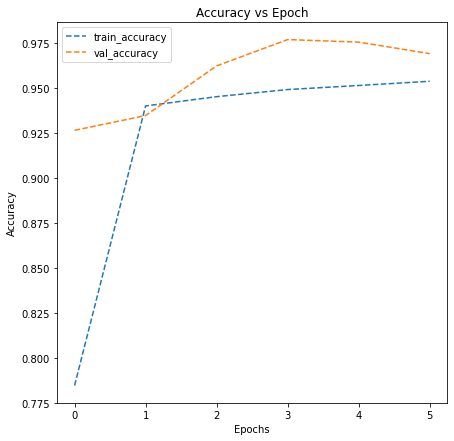

In [41]:
plot_accuracy(history)



* Here we can clearly observe that the training and valiation accuracy are increasing 
* And we can also notice that validation accuracy is slightly higher than the train accuracy

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model S
####<b> Trying to improve the performance of our model by executing with more epochs

In [42]:

#creating sequential model
models=Sequential()
models.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(64,64,3)))
models.add(MaxPooling2D(pool_size=2))
models.add(Dropout(0.2))
models.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
models.add(MaxPooling2D(pool_size=2))
models.add(Dropout(0.2))
models.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
models.add(MaxPooling2D(pool_size=2))
models.add(Dropout(0.2))


models.add(Flatten())

models.add(Dense(512,activation="relu"))
models.add(Dropout(0.4))
models.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
models.summary()

models.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

#Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history=models.fit(train_images,train_labels,batch_size=32,callbacks=callbacks,validation_split=0.2,epochs=100,verbose=1)             

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 32)       

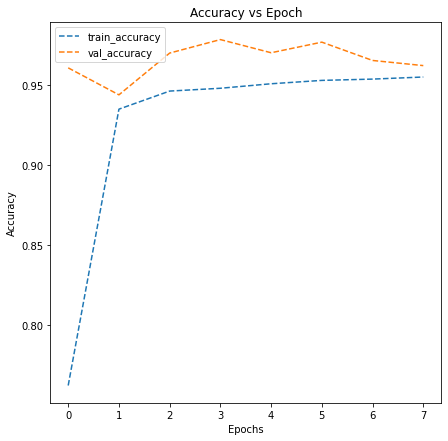

In [43]:
plot_accuracy(history)

Results are similar to running it with 20 epochs. EarlyStop stopped the execution once model had learned the optimzed way.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers

In [44]:
#Clearing backend
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [45]:

#creating sequential model
model1=Sequential()
model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(64,64,3)))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=128,kernel_size=2,padding="same",activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=128,kernel_size=2,padding="same",activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))


model1.add(Flatten())

model1.add(Dense(512,activation="relu"))
model1.add(Dropout(0.4))
model1.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model1.summary()

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

#Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history1=model1.fit(train_images,train_labels,batch_size=32,callbacks=callbacks,validation_split=0.2,epochs=100,verbose=1)             

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        8

####<b> Evaluating the model

In [46]:
accuracy1 = model1.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy1[1])

82/82 [==============================] - 4s 41ms/step - loss: 0.1471 - accuracy: 0.9508

 Test_Accuracy:- 0.9507692456245422


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1300
           1       0.95      0.95      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



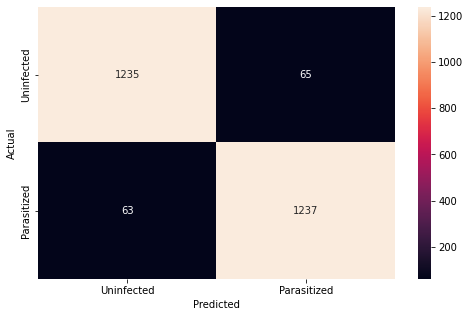

In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model1.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)

#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b> Plotting the Train and validation curves

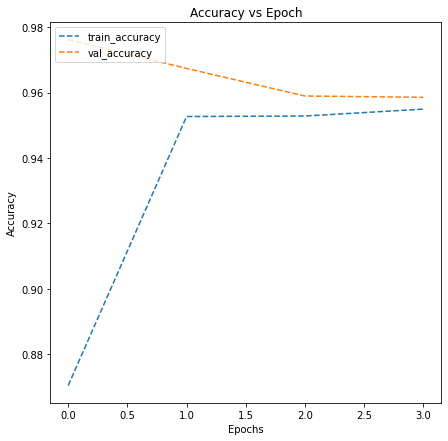

In [48]:
plot_accuracy(history1)

####<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [49]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [50]:

#creating sequential model
model2=Sequential()
model2.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",input_shape=(64,64,3)))
model2.add(LeakyReLU(alpha=0.2))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=64,kernel_size=(3,3),padding="same"))
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=128,kernel_size=(3,3),padding="same"))
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=256,kernel_size=(3,3),padding="same"))
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

model2.add(Flatten())

model2.add(Dense(512,activation="softmax"))
model2.add(Dropout(0.4))
model2.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model2.summary()

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

#Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history2=model2.fit(train_images,train_labels,batch_size=32,callbacks=callbacks,validation_split=0.2,epochs=100,verbose=1)  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        1

Plotting the train and validation accuracy

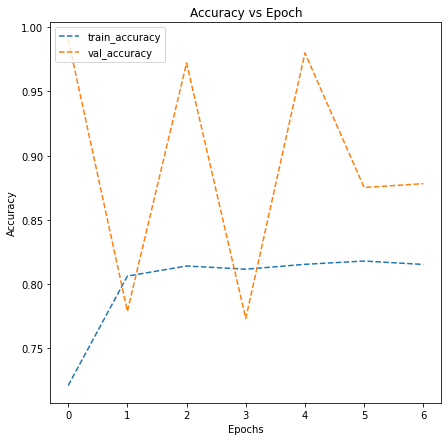

In [51]:
plot_accuracy(history2)

####<b>Evaluating the model

In [52]:
accuracy = model2.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 10s 119ms/step - loss: 0.2745 - accuracy: 0.9146

 Test_Accuracy:- 0.9146153926849365


#####<b>Observations and insights: ____

<b> Generate the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1300
           1       0.87      0.97      0.92      1300

    accuracy                           0.91      2600
   macro avg       0.92      0.91      0.91      2600
weighted avg       0.92      0.91      0.91      2600



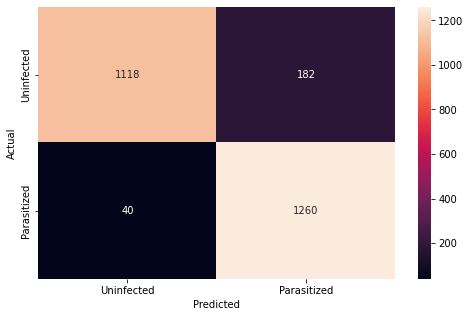

In [53]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model2.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)
#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

####**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)


###<b>Model 3 with Data Augmentation

In [54]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Using image data generator

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images

train_datagen = ImageDataGenerator(horizontal_flip=True, 
                                  zoom_range = 0.5, rotation_range=30)
val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x =X_train, y = y_train, batch_size=64, seed=42, shuffle=True)     

# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x= X_val, y = y_val, batch_size=64, seed=42, shuffle=True)

####**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.

####<B>Visualizing Augmented images

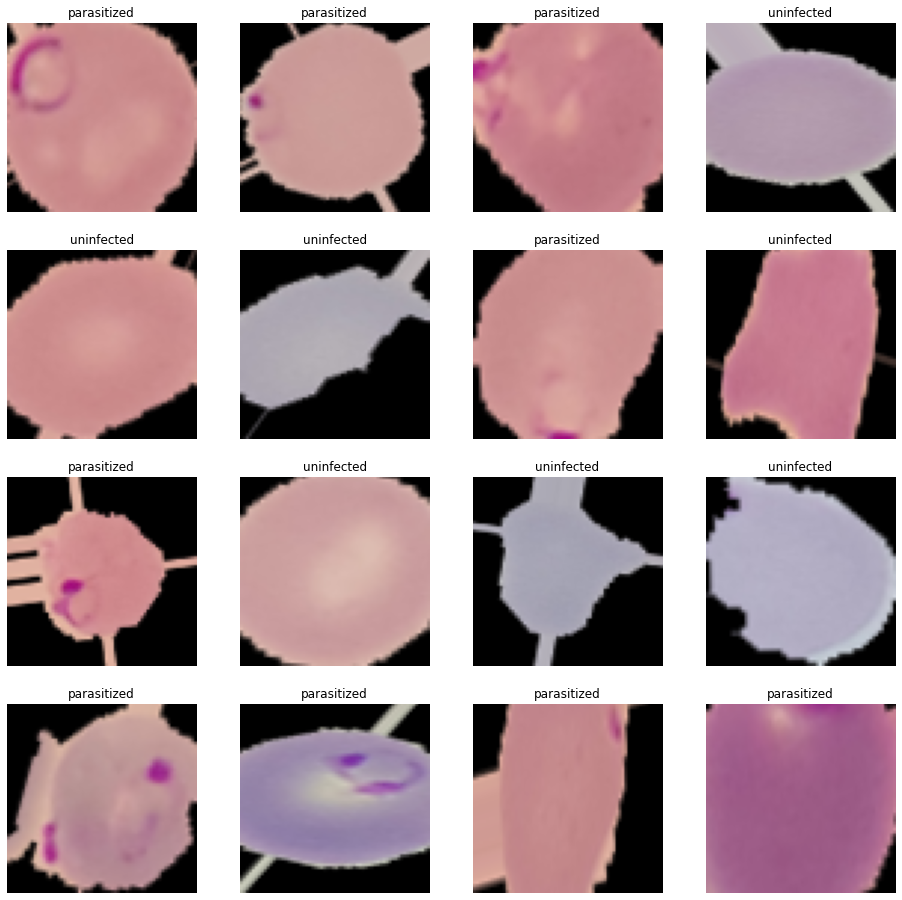

In [56]:
#Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

#Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))
fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    if label[1] == 1: 
        ax.set_title('parasitized')
    else:
        ax.set_title('uninfected')
    ax.axis('off')

#####<b>Observations and insights: ____

####<b>Building the Model

In [ ]:
#creating sequential model
model3=Sequential()

# First convolution extracts 32 filters that are 3x3
# Convolution is followed by LeakyRelu activation and max-pooling layer with a 2x2 window
model3.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",input_shape=(64,64,3)))
model3.add(LeakyReLU(alpha=0.2))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=2))


model3.add(Conv2D(filters=64,kernel_size=(3,3),padding="same"))
model3.add(LeakyReLU(alpha=0.1))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=2))

model3.add(Conv2D(filters=128,kernel_size=(3,3),padding="same"))
model3.add(LeakyReLU(alpha=0.1))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=2))

model3.add(Conv2D(filters=256,kernel_size=(3,3),padding="same"))
model3.add(LeakyReLU(alpha=0.1))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=2))

model3.add(Flatten())

model3.add(Dense(512,activation="softmax"))
model3.add(Dropout(0.5))
model3.add(Dense(128,activation="softmax"))
model3.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model3.summary()

# use this as the optimizer
adam = optimizers.Adam(learning_rate=0.001)

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

#Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history3 = model3.fit(train_generator, 
                                  validation_data=val_generator,
                                  batch_size=32,callbacks=callbacks,
                                  epochs=20,verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0

####<B>Evaluating the model

<b>Plot the train and validation accuracy

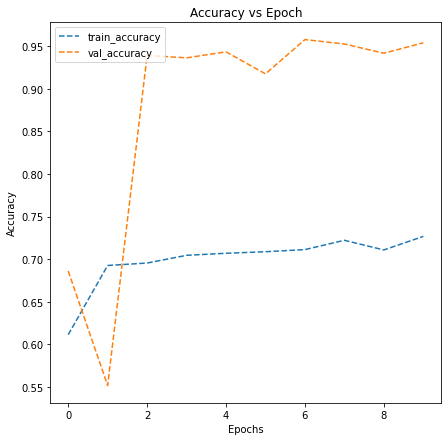

In [61]:
# plotting the accuracies
plot_accuracy(history3)

In [68]:
# # Evaluating the model on test data
accuracy3 = model3.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 11s 126ms/step - loss: 0.2421 - accuracy: 0.9454

 Test_Accuracy:- 0.9453846216201782


<b>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1300
           1       0.97      0.92      0.94      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



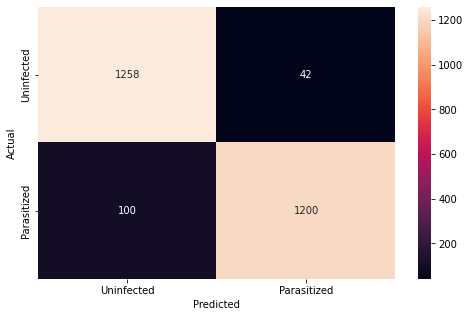

In [71]:
# Plotting the heatmap using confusion matrix
pred = model3.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)

#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Now let us try to use a pretrained model like VGG16 and check how it performs on our data.

Pre-trained model (VGG16)

In [1]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

NameError: ignored

In [85]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(64,64,3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [86]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable=False

# Add classification layers on top of it  
 
x = Flatten()(transfer_layer.output) #Flatten the output from the 3rd block of the VGG16 model
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)

# Add a dense layer with 64 neurons

x = BatchNormalization()(x)
pred = Dense(2, activation='softmax')(x)

model4 = Model(vgg.input, pred) #Initializing the model

####<b>Compiling the model

In [87]:
#Compiling the model
model4.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adamax(learning_rate = 0.0005),
              metrics=['accuracy'])

<b> using callbacks

In [88]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b>Fit and Train the model

In [ ]:
#Fitting the model and running the model for 10 epochs
history4 = model4.fit(
            train_images,train_labels,
            epochs=10,
            callbacks=callbacks,
            batch_size=250,
            validation_split=0.2,
            verbose=1
)


Epoch 1/10
67/80 [========================>.....] - ETA: 2:10 - loss: 0.3751 - accuracy: 0.8510

In [83]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

NameError: ignored